# Fraudulent Transaction Prediction

The Dataset is to be identify about a transaction to predict whether it is Fraudulent or Not

We are presented with a labeled dataset of financial transactions, some of which are fraudulent. We will be performing exploratory data analysis on this data, and then creating a classifier model to predict whether a transaction is fraudulent given the included features. The objective of this project is to explain my thought processes in solving this problem, as well as addressing some of the issues that inherently face machine learning models. ("All models are wrong, but some are useful.") Using this notebook, I hope to focus primarily on transparency and clarity rather than raw predictive performance, and readability for an audience without a specialization in data science.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
import xgboost as xgb
import sklearn.metrics as metrics

import math
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#We want our plots to appear in the Notebook
%matplotlib inline 

In [2]:
#Read The Dataset
data = pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# describe the dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
#data structure
print(type(data))
data.shape

<class 'pandas.core.frame.DataFrame'>


(6362620, 11)

In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
#data types of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
#count the duplicates
data[data.duplicated()].shape

(0, 11)

In [10]:
#To identify the unique values
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
skew_data=data.skew()
skew_data

C:\Users\advai\AppData\Local\Temp/ipykernel_14556/1525158086.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_data=data.skew()


step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

In [12]:
print('Data does not have any NULL value.')
data.isnull().any()

Data does not have any NULL value.


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [13]:
data.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)
data.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some threshold value.

In [14]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].min()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [15]:
print('Maximum value of Amount, Old/New Balance of Origin/Destination:')
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].max()

Maximum value of Amount, Old/New Balance of Origin/Destination:


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

Data analysis

Since there are no missing and junk values, there is no need for additional data cleansing, but we still need to perform data analysis since the data contains huge variations in the value in different columns. Normalization will also improve the overall accuracy of the machine learning model.

# Data analysis

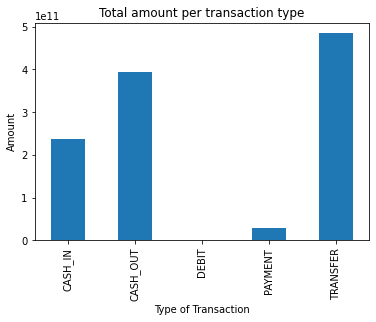

In [16]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [17]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [18]:
# Pairwise Pearson correlations
correlations = data.corr(method='pearson')
print(correlations)

                    step    amount  oldbalanceOrg  newbalanceOrg  \
step            1.000000  0.022373      -0.010058      -0.010299   
amount          0.022373  1.000000      -0.002762      -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000       0.998803   
newbalanceOrg  -0.010299 -0.007861       0.998803       1.000000   
oldbalanceDest  0.027665  0.294137       0.066243       0.067812   
newbalanceDest  0.025888  0.459304       0.042029       0.041837   
isFraud         0.031578  0.076688       0.010154      -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835       0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrg         0.067812        0.041837 -0.008148        0.003776  
oldbalanceDe

In [19]:
data.corr()['isFraud']

step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrg    -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

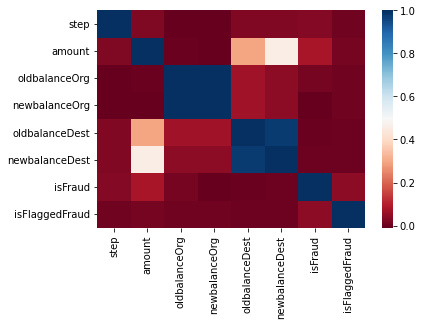

In [20]:
sns.heatmap(data.corr(),cmap='RdBu');

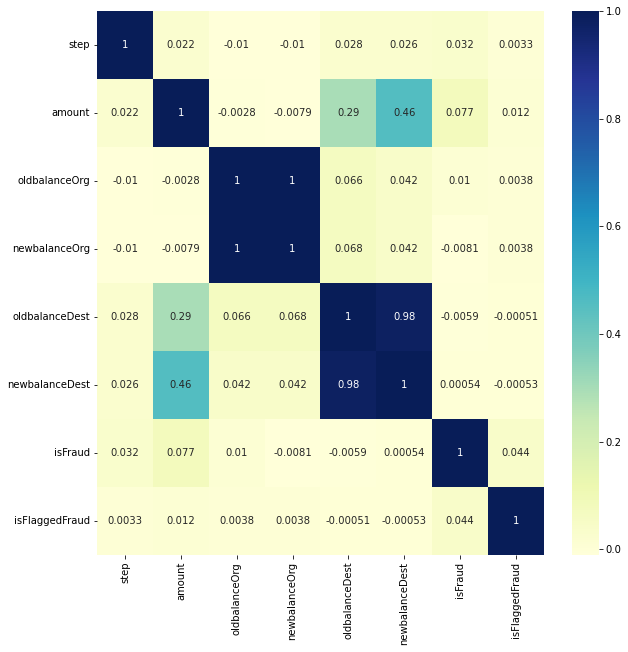

In [21]:
mat=data.corr()
top_corr_features=mat.index
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='YlGnBu')

What can we do with this heatmap:

OldbalanceOrg and NewbalanceOrg are highly correlated.
OldbalanceDest and NewbalanceDest are highly correlated.
The sum correlates with isFraud(target variable).
There is not much relationship between these features, so we need to understand where the relationship between them depends on the type of transaction and the amount. To do this, we need to see the heatmap of fraudulent and non-fraudulent transactions differently.

In [22]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

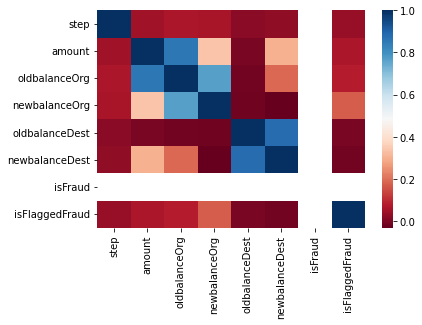

In [23]:
sns.heatmap(fraud.corr(),cmap='RdBu',);

There are 2 flags that stand out to me that are interesting to look at: isFraud and isFlaggedFraud column. Based on the hypothesis, isFraud is an indicator that indicates actual fraudulent transactions, while isFlaggedFraud is that the system is preventing a transaction due to some thresholds being triggered. From the heatmap above, we can see that there is some relationship between the other columns and isFlaggedFraud, hence there must be a relationship between isFraud.

In [24]:
print('The total number of fraud transaction is {}.'.format(data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [25]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))


Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


In [26]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

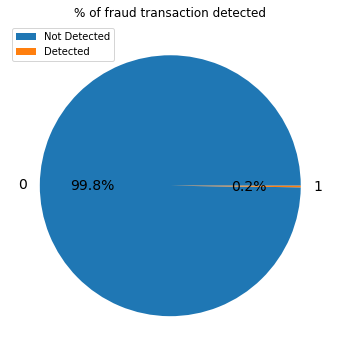

In [27]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

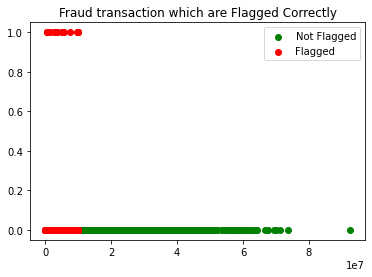

In [28]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

In [29]:
fraud= data.groupby('isFraud').size()
print(fraud)

isFraud
0    6354407
1       8213
dtype: int64


In [30]:
fraud=data.isFraud.value_counts(normalize=True)*100
fraud

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

In [31]:
false=data[data['isFraud']==1]
true=data[data['isFraud']==0]
n=len(false)/float(len(true))
print('false detection:{}'.format(len(data[data['isFraud']==1])))
print('true detection:{}'.format(len(data[data['isFraud']==0])))

false detection:8213
true detection:6354407


In [32]:
false=data[data['isFraud']==1]
true=data[data['isFraud']==0]
print('false detection')
print(false.amount.describe()/100,"\n")

print('true detection')
print(true.amount.describe()/100)

false detection
count        82.130000
mean      14679.672991
std       24042.529472
min           0.000000
25%        1270.913300
50%        4414.234400
75%       15177.714800
max      100000.000000
Name: amount, dtype: float64 

true detection
count     63544.070000
mean       1781.970417
std        5962.369813
min           0.000100
25%         133.683950
50%         746.847200
75%        2083.647600
max      924455.166400
Name: amount, dtype: float64


From the above data we can infer that less than 0.13% of the total transaction are fraudulent

The plot above clearly shows the need for a system that can be fast and reliable to flag a transaction as a fraud. Because the current system allows fraudulent transactions to go through a system that does not label them as fraud. Some data exploration can be useful for testing relationships between objects.

# Data Visualization for descrete data

<AxesSubplot:>

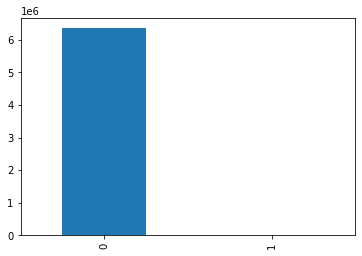

In [33]:
data.isFraud.value_counts().plot(kind='bar')

<AxesSubplot:>

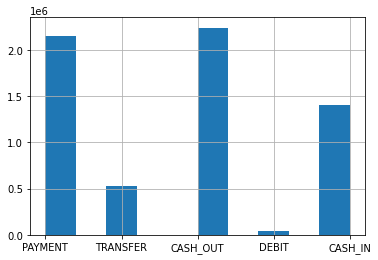

In [34]:
#histogram of types of transaction
data['type'].hist()

In [35]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [36]:
print("individual type of transactions:")
print((data.type.value_counts()/data.type.value_counts().sum())*100)

individual type of transactions:
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: type, dtype: float64


Text(0.5, 1.0, 'Types of Transactions')

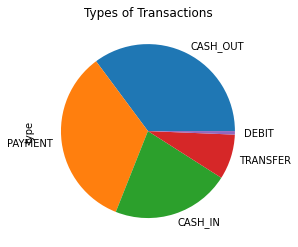

In [37]:
data.type.value_counts().plot(kind='pie')
plt.title('Types of Transactions')

<AxesSubplot:>

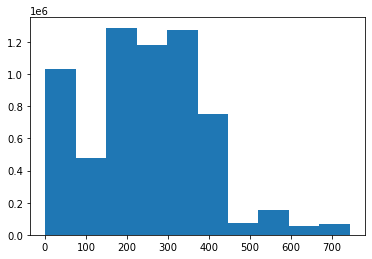

In [38]:
data.step.hist(grid=False)

# Data exploration

In [39]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

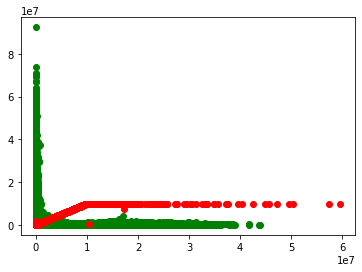

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

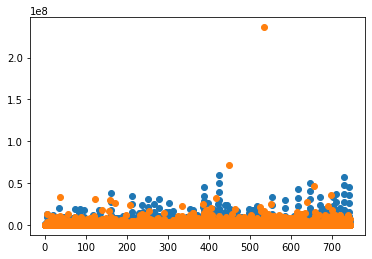

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

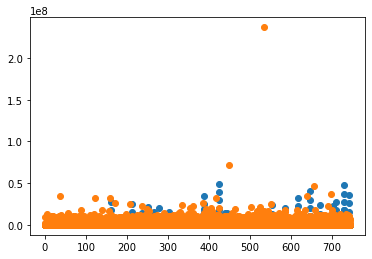

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

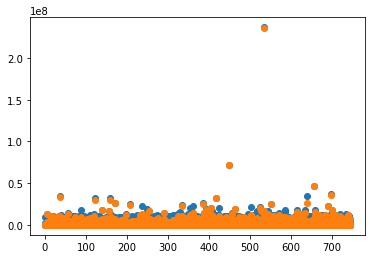

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

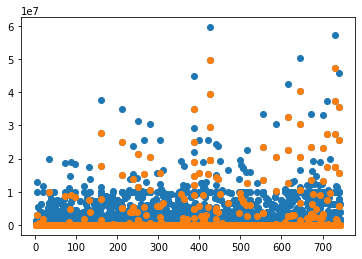

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

In [45]:
pd.crosstab(data.isFraud, data.type)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


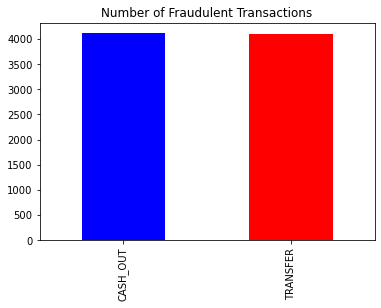

In [46]:
data.type[data.isFraud == 1].value_counts().plot(kind="bar", color=["blue","red"])

plt.title("Number of Fraudulent Transactions");

From the above crosstab we can infer that fraudulent transactions take place only in CASH_OUT and TRASNFER type of transactions where 4116 of CASH_OUT and 4097 of TRANSFER transactions where fraudulent.

# To find out the Target variable using manual prediction

In [47]:
data=pd.read_csv("Fraud.csv")

In [48]:
data['merchant'] = data['nameDest'].str.contains('M')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True


In [49]:
data[['isFraud','merchant']].value_counts()

isFraud  merchant
0        False       4202912
         True        2151495
1        False          8213
dtype: int64

In [50]:
data[data['isFraud']==1].head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,False
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0,False
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0,False
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0,False
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0,False
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0,False
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0,False
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0,False
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0,False


In [51]:
# Counts of each transaction type for fraudulent transactions
data[data['isFraud']==1]['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

TO identify in PAYMENT MODE

In [52]:
payment=data[data['type']=='PAYMENT']
payment

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,True
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0,True
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0,True
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0,True
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0,True


In [53]:
payment.shape

(2151495, 12)

In [54]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151495 entries, 0 to 6362319
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  merchant        bool   
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 199.0+ MB


In [55]:
data['balancediffOrig'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balancediffDest'] = data['newbalanceDest'] - data['oldbalanceDest']
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,-11668.14,0.0


In [56]:
data['Orig_diff_amount']=data['amount']+data['balancediffOrig']
data['dest_diff_amount']=data['amount']+data['balancediffDest']
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True,-9839.64,0.0,-1.455192e-11,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True,-1864.28,0.0,1.136868e-12,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,-181.00,0.0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,-181.00,-21182.0,0.000000e+00,-21001.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,-11668.14,0.0,0.000000e+00,11668.14


In [57]:
def not_fraud(data):
    lab=[]
    for i in range(len(data)):
        l=int(0)
        lab.append(l)
    return lab

In [58]:
def fraud(data):
    lab=[]
    for i in range(len(data)):
        l=int(1)
        lab.append(l)
    return lab

In [59]:
payment["Fraud_Id"]=data[data["type"]=="PAYMENT"]['isFraud']

C:\Users\advai\AppData\Local\Temp/ipykernel_14556/279791607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment["Fraud_Id"]=data[data["type"]=="PAYMENT"]['isFraud']


In [60]:
payment["Fraud_Id"].value_counts()

0    2151495
Name: Fraud_Id, dtype: int64

In [61]:
payment["Fraud_Id"].unique()

array([0], dtype=int64)

There is no Fraud cases in PAYMENT MODE

# Cash in

In [62]:
cashin=data[data['type']=='CASH_IN']
cashin

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0,False,143236.26,-511668.39,286472.52,-3.684321e+05
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0,False,228451.89,466878.43,456903.78,6.953303e+05
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0,False,35902.50,-49003.30,71804.99,-1.310081e+04
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0,False,232953.63,344589.89,465907.27,5.775435e+05
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0,False,65912.95,-80154.08,131825.90,-1.424113e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362253,718,CASH_IN,188888.89,C1459052107,51838.00,240726.89,C1955750585,0.00,0.00,0,0,False,188888.89,0.00,377777.78,1.888889e+05
6362271,718,CASH_IN,27919.60,C562982749,2413.00,30332.60,C240654881,512791.59,484871.98,0,0,False,27919.60,-27919.61,55839.20,-1.000000e-02
6362279,718,CASH_IN,78988.38,C886862695,204464.00,283452.38,C262804200,108724.19,29735.81,0,0,False,78988.38,-78988.38,157976.76,0.000000e+00
6362298,718,CASH_IN,18000.26,C50108853,63409.00,81409.26,C204102272,28088.61,10088.34,0,0,False,18000.26,-18000.27,36000.52,-1.000000e-02


In [63]:
cashin["Fraud_Id"]=data[data["type"]=="CASH_IN"]['isFraud']

C:\Users\advai\AppData\Local\Temp/ipykernel_14556/686279831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cashin["Fraud_Id"]=data[data["type"]=="CASH_IN"]['isFraud']


In [64]:
cashin.Fraud_Id.value_counts()

0    1399284
Name: Fraud_Id, dtype: int64

In [65]:
cashin.Fraud_Id.unique()

array([0], dtype=int64)

# Debit

In [66]:
debit=data[data['type']=='DEBIT']
debit

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0,False,-5337.77,-1549.21,3.637979e-12,3788.56
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0,False,-4465.00,147137.12,5.179940e+03,156782.06
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0,False,-9302.79,-12935.30,0.000000e+00,-3632.51
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.00,0.00,0,0,False,-1065.41,-10330.00,2.273737e-13,-9264.59
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.00,16997.22,0,0,False,-5758.59,-192701.78,0.000000e+00,-186943.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362247,718,DEBIT,2063.08,C397492133,328612.0,326548.92,C1557979171,1312720.98,1314784.06,0,0,False,-2063.08,2063.08,-1.637090e-11,4126.16
6362254,718,DEBIT,425.65,C1835928822,4046.0,3620.35,C701975669,3009282.73,3009708.38,0,0,False,-425.65,425.65,-1.136868e-13,851.30
6362282,718,DEBIT,1636.03,C761454361,83120.0,81483.97,C355970563,8393318.02,8394954.05,0,0,False,-1636.03,1636.03,1.136868e-12,3272.06
6362303,718,DEBIT,2148.99,C1909103796,49632.0,47483.01,C1931871221,66241.39,68390.38,0,0,False,-2148.99,2148.99,1.818989e-12,4297.98


In [67]:
debit["Fraud_Id"]=data[data["type"]=="DEBIT"]['isFraud']

C:\Users\advai\AppData\Local\Temp/ipykernel_14556/2712071344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit["Fraud_Id"]=data[data["type"]=="DEBIT"]['isFraud']


In [68]:
debit.Fraud_Id.value_counts()

0    41432
Name: Fraud_Id, dtype: int64

In [69]:
debit.Fraud_Id.unique()

array([0], dtype=int64)

# Cash out

In [70]:
cashout=data[data['type']=='CASH_OUT']
cashout

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,False,-181.00,-21182.00,0.00,-21001.00
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,False,-15325.00,46430.44,213808.94,275564.38
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0,False,-26845.41,-286384.84,83569.30,-175970.13
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0,False,-1942.02,-6146.82,55011.88,50807.08
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0,False,0.00,5800793.91,5346.89,5806140.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,False,-63416.99,63416.99,0.00,126833.98
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,False,-1258818.82,1258818.83,0.00,2517637.65
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,False,-339682.13,339682.13,0.00,679364.26
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,False,-6311409.28,6311409.27,0.00,12622818.55


In [71]:
cashout.shape

(2237500, 16)

Cash out NOT FRAUD TRANSACTION

In [72]:
cashout_notfraud=cashout[cashout['oldbalanceOrg']==0]
cashout_notfraud1=cashout[(cashout['amount']>=cashout['oldbalanceOrg'])&
          (cashout['balancediffDest']<0) & cashout['oldbalanceOrg']!=0]
cashout_notfraud2=cashout[(cashout['amount']<cashout['oldbalanceOrg'])&
          (cashout['balancediffDest']<0) & cashout['oldbalanceOrg']!=0]
cashout_notfraud3=pd.concat([cashout_notfraud,cashout_notfraud1,cashout_notfraud2],axis=0)

In [73]:
cashout_notfraud3['Fraud_Id']=not_fraud(cashout_notfraud3)
cashout_notfraud3

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount,Fraud_Id
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0,False,0.00,5800793.91,5.346890e+03,5806140.80,0
106,1,CASH_OUT,28404.60,C2091072548,0.00,0.00,C1282788025,51744.00,0.00,0,0,False,0.00,-51744.00,2.840460e+04,-23339.40,0
107,1,CASH_OUT,75405.10,C263053820,0.00,0.00,C1870252780,104209.00,46462.23,0,0,False,0.00,-57746.77,7.540510e+04,17658.33,0
108,1,CASH_OUT,50101.88,C1740826931,0.00,0.00,C97730845,67684.00,9940339.29,0,0,False,0.00,9872655.29,5.010188e+04,9922757.17,0
109,1,CASH_OUT,14121.82,C69062746,0.00,0.00,C100555887,52679.00,10963.66,0,0,False,0.00,-41715.34,1.412182e+04,-27593.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252549,596,CASH_OUT,79683.21,C1498847403,117730.00,38046.79,C804209888,901894.50,796038.62,0,0,False,-79683.21,-105855.88,1.455192e-11,-26172.67,0
6314788,687,CASH_OUT,28062.81,C1090414984,31512.00,3449.19,C1634341170,129449.69,0.00,0,0,False,-28062.81,-129449.69,0.000000e+00,-101386.88,0
6316759,687,CASH_OUT,19801.26,C932574627,251375.00,231573.74,C989557428,963792.00,919641.63,0,0,False,-19801.26,-44150.37,-1.091394e-11,-24349.11,0
6323444,688,CASH_OUT,131918.26,C106400029,262831.41,130913.15,C2100822203,796912.79,787819.68,0,0,False,-131918.26,-9093.11,2.910383e-11,122825.15,0


cash out Fraud Transactions

In [74]:
cashout_fraud=cashout[(cashout['amount']>=cashout['oldbalanceOrg'])&
                 (cashout['amount']==cashout['balancediffDest']) & cashout['oldbalanceOrg']!=0]
cashout_fraud1=cashout[(cashout["amount"]>=cashout["oldbalanceOrg"]) & 
                          (cashout["amount"]<cashout["balancediffDest"]) & cashout["oldbalanceOrg"]!=0]
cashout_fraud2=pd.concat([cashout_fraud,cashout_fraud1],axis=0)

In [75]:
cashout_fraud2['Fraud_Id']=fraud(cashout_fraud2)
cashout_fraud2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount,Fraud_Id
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.0,C1364913072,9083.76,34155.22,1,0,False,-25071.46,25071.46,0.00,50142.92,1
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.0,C297927961,0.00,132842.64,1,0,False,-4499.08,132842.64,128343.56,265685.28,1
2220,1,CASH_OUT,219630.79,C602830277,19779.08,0.0,C2118255842,29186.69,248817.48,0,0,False,-19779.08,219630.79,199851.71,439261.58,1
2302,1,CASH_OUT,235238.66,C1499825229,235238.66,0.0,C2100440237,0.00,235238.66,1,0,False,-235238.66,235238.66,0.00,470477.32,1
3029,2,CASH_OUT,312856.00,C21331934,58198.26,0.0,C1286084959,1610980.34,1923836.34,0,0,False,-58198.26,312856.00,254657.74,625712.00,1


In [76]:
cashout_true_fraud=pd.concat([cashout_notfraud3,cashout_fraud2],axis=0)
cashout_true_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount,Fraud_Id
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0,False,0.00,5800793.91,5346.89,5806140.80,0
106,1,CASH_OUT,28404.60,C2091072548,0.00,0.0,C1282788025,51744.00,0.00,0,0,False,0.00,-51744.00,28404.60,-23339.40,0
107,1,CASH_OUT,75405.10,C263053820,0.00,0.0,C1870252780,104209.00,46462.23,0,0,False,0.00,-57746.77,75405.10,17658.33,0
108,1,CASH_OUT,50101.88,C1740826931,0.00,0.0,C97730845,67684.00,9940339.29,0,0,False,0.00,9872655.29,50101.88,9922757.17,0
109,1,CASH_OUT,14121.82,C69062746,0.00,0.0,C100555887,52679.00,10963.66,0,0,False,0.00,-41715.34,14121.82,-27593.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362559,738,CASH_OUT,114490.39,C1586103602,114490.39,0.0,C1196711051,166082.07,280572.46,1,0,False,-114490.39,114490.39,0.00,228980.78,1
6362561,739,CASH_OUT,176549.59,C1566996689,176549.59,0.0,C886844880,409531.17,586080.76,1,0,False,-176549.59,176549.59,0.00,353099.18,1
6362567,739,CASH_OUT,8116.53,C564539602,8116.53,0.0,C1935865739,7638.26,15754.79,1,0,False,-8116.53,8116.53,0.00,16233.06,1
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0,False,-258355.42,258355.42,0.00,516710.84,1


In [77]:
cashout_true_fraud.Fraud_Id.value_counts()

0    1044727
1     686480
Name: Fraud_Id, dtype: int64

In [78]:
cashout_true_fraud.Fraud_Id.unique()

array([0, 1], dtype=int64)

# Transfer Mode

In [79]:
transfer=data[data['type']=='TRANSFER']
transfer

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,False,-181.00,0.00,0.00,181.00
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,False,-705.00,-22425.00,214605.30,192885.30
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,False,-10835.00,2712905.89,300850.89,3024591.78
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,False,-62610.80,7866.29,0.00,70477.09
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,False,-10363.39,-33857.48,32349.00,8854.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0,False,-63416.99,0.00,0.00,63416.99
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0,False,-1258818.82,0.00,0.00,1258818.82
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0,False,-339682.13,0.00,0.00,339682.13
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,False,-6311409.28,0.00,0.00,6311409.28


In [80]:
fraud_transfer1=transfer[(transfer["balancediffOrig"]<=0) & (transfer["balancediffDest"]<=0) & 
             (transfer["Orig_diff_amount"]>transfer["dest_diff_amount"])]
fraud_transfer2=transfer[(transfer["balancediffOrig"]>=0) & (transfer["balancediffDest"]>=0) & 
             (transfer["Orig_diff_amount"]>=transfer["dest_diff_amount"])]
fraud_transfer3=pd.concat([fraud_transfer1,fraud_transfer2],axis=0)
fraud_transfer3.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,False,-705.00,-22425.00,214605.30,192885.30
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,False,-10363.39,-33857.48,32349.00,8854.91
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0,False,0.00,-72666.35,77957.68,5291.33
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0,False,0.00,-24672.00,17231.46,-7440.54
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0,False,0.00,-354678.92,224606.64,-130072.28


In [81]:
fraud_transfer3.shape

(3388, 16)

In [82]:
transfer[(transfer["balancediffOrig"]>=0) & (transfer["balancediffDest"]>=0) &
             (transfer["Orig_diff_amount"]==transfer["dest_diff_amount"])]
transfer[(transfer["balancediffOrig"]>=0) & (transfer["balancediffDest"]>=0) \
             & (transfer["Orig_diff_amount"]!=transfer["dest_diff_amount"])]
transfer[(transfer["oldbalanceOrg"]==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
79,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,False,0.0,-72666.35,77957.68,5291.33
80,1,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0,False,0.0,-24672.00,17231.46,-7440.54
81,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0,False,0.0,173743.05,78766.03,252509.08
82,1,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0,False,0.0,-354678.92,224606.64,-130072.28
83,1,TRANSFER,125872.53,C1443967876,0.0,0.0,C392292416,348512.00,3420103.09,0,0,False,0.0,3071591.09,125872.53,3197463.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355888,709,TRANSFER,320850.95,C1573976819,0.0,0.0,C1169803709,5269023.79,5589874.74,0,0,False,0.0,320850.95,320850.95,641701.90
6355889,709,TRANSFER,356125.69,C1983718805,0.0,0.0,C1377991863,504337.26,860462.95,0,0,False,0.0,356125.69,356125.69,712251.38
6355890,709,TRANSFER,675523.93,C1428911688,0.0,0.0,C1163550147,3394024.85,4069548.78,0,0,False,0.0,675523.93,675523.93,1351047.86
6355891,709,TRANSFER,273051.66,C2035190075,0.0,0.0,C1404837226,510576.10,783627.75,0,0,False,0.0,273051.65,273051.66,546103.31


In [83]:
transfer["Fraud_Id"]=data[data["type"]=="TRANSFER"]["isFraud"]
transfer

C:\Users\advai\AppData\Local\Temp/ipykernel_14556/3771782613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer["Fraud_Id"]=data[data["type"]=="TRANSFER"]["isFraud"]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount,Fraud_Id
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,False,-181.00,0.00,0.00,181.00,1
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,False,-705.00,-22425.00,214605.30,192885.30,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,False,-10835.00,2712905.89,300850.89,3024591.78,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,False,-62610.80,7866.29,0.00,70477.09,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,False,-10363.39,-33857.48,32349.00,8854.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0,False,-63416.99,0.00,0.00,63416.99,1
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0,False,-1258818.82,0.00,0.00,1258818.82,1
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0,False,-339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,False,-6311409.28,0.00,0.00,6311409.28,1


In [84]:
transfer.Fraud_Id.value_counts()

0    528812
1      4097
Name: Fraud_Id, dtype: int64

In [85]:
transfer.Fraud_Id.unique()

array([1, 0], dtype=int64)

# final transaction data

In [86]:
df=pd.concat([payment,debit,cashin,transfer,cashout_true_fraud],axis=0)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,Fraud_Id,balancediffOrig,balancediffDest,Orig_diff_amount,dest_diff_amount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0,True,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362559,738,CASH_OUT,114490.39,C1586103602,114490.39,0.00,C1196711051,166082.07,280572.46,1,0,False,1,-114490.39,114490.39,0.0,228980.78
6362561,739,CASH_OUT,176549.59,C1566996689,176549.59,0.00,C886844880,409531.17,586080.76,1,0,False,1,-176549.59,176549.59,0.0,353099.18
6362567,739,CASH_OUT,8116.53,C564539602,8116.53,0.00,C1935865739,7638.26,15754.79,1,0,False,1,-8116.53,8116.53,0.0,16233.06
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0,False,1,-258355.42,258355.42,0.0,516710.84


In [87]:
df['Fraud_Id'].value_counts()

0    5165750
1     690577
Name: Fraud_Id, dtype: int64

In [88]:
df['Fraud_Id'].unique()

array([0, 1], dtype=int64)

In [89]:
df['type'].value_counts()

PAYMENT     2151495
CASH_OUT    1731207
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

# Data Cleaning

In [90]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [91]:
data= df.drop(['nameOrig','nameDest','isFraud','isFlaggedFraud','balancediffOrig','balancediffDest','Orig_diff_amount','dest_diff_amount','merchant'],axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0


In [92]:
data1=data.copy()
data1['Fraud_Id']=data1['Fraud_Id'].astype(int)

In [93]:
data1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0


0    5165750
1     690577
Name: Fraud_Id, dtype: int64


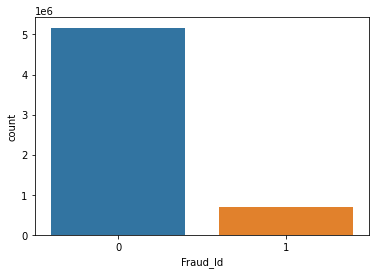

In [94]:
px=sns.countplot(x='Fraud_Id',data=data1)
print(data1['Fraud_Id'].value_counts())

# undersampling

In [95]:
target='Fraud_Id'

In [96]:
x=data1.loc[:,data1.columns!=target]
y=data1.loc[:,data1.columns==target]

In [97]:
fraud_df_len=len(y[y[target]==1])
print (fraud_df_len)

690577


In [98]:
fraud_df = data1[data1[target]==1].index
print (fraud_df)

Int64Index([      2,     251,     680,     969,    1115,    1869,    2301,
               3059,    3162,    3271,
            ...
            6362537, 6362541, 6362547, 6362553, 6362555, 6362559, 6362561,
            6362567, 6362609, 6362613],
           dtype='int64', length=690577)


In [99]:
non_fraud_df = data1[data1[target] == 0].index
print (non_fraud_df)

Int64Index([      0,       1,       4,       5,       6,       7,       8,
                 11,      12,      13,
            ...
            6097168, 6136627, 6158084, 6205617, 6218251, 6252549, 6314788,
            6316759, 6323444, 6352499],
           dtype='int64', length=5165750)


In [100]:
random_df=np.random.choice(non_fraud_df,fraud_df_len,replace=False)
print(len(random_df))

690577


In [101]:
sampling = np.concatenate([random_df, fraud_df])
under_sampling=data1.loc[sampling]
under_sampling

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id
1373838,138,CASH_OUT,122055.81,0.00,0.00,831534.27,953590.08,0
5159079,357,PAYMENT,3167.71,45726.00,42558.29,0.00,0.00,0
5995284,422,CASH_OUT,41797.54,0.00,0.00,2618059.43,2659856.97,0
1405613,139,PAYMENT,5759.09,0.00,0.00,0.00,0.00,0
2743820,212,PAYMENT,7455.39,145804.55,138349.16,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362559,738,CASH_OUT,114490.39,114490.39,0.00,166082.07,280572.46,1
6362561,739,CASH_OUT,176549.59,176549.59,0.00,409531.17,586080.76,1
6362567,739,CASH_OUT,8116.53,8116.53,0.00,7638.26,15754.79,1
6362609,742,CASH_OUT,258355.42,258355.42,0.00,25176.67,283532.09,1


0    5165750
1     690577
Name: Fraud_Id, dtype: int64


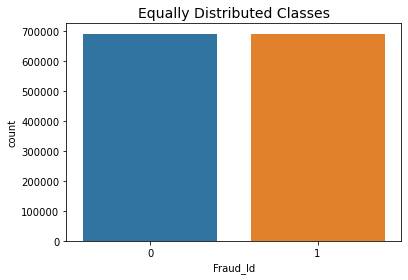

In [102]:
ax=sns.countplot(x=target,data=under_sampling)
print(data1[target].value_counts())
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# model performance

In [103]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()

under_sampling['type']=label_encoder.fit_transform(under_sampling['type'])
under_sampling['Fraud_Id']=label_encoder.fit_transform(under_sampling['Fraud_Id'])
under_sampling['Fraud_Id'].unique()

array([0, 1], dtype=int64)

In [104]:
x=under_sampling.drop(['Fraud_Id'],axis=1)
y=under_sampling['Fraud_Id']

In [105]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [106]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1104923, 7), (276231, 7), (1104923,), (276231,))

In [107]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1283113,135,0,283667.58,16206.00,299873.58,6229.36,0.00
6032696,474,1,408779.93,20436.00,0.00,168961.71,577741.64
992022,45,0,30133.03,8898364.27,8928497.29,858355.88,828222.85
582613,33,1,419865.44,481.00,0.00,0.00,419865.44
3830874,282,3,15724.06,11015.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
70054,9,3,19643.34,150896.00,131252.66,0.00,0.00
1019589,47,3,1040.76,4117.00,3076.24,0.00,0.00
4750384,333,3,522.40,27962.42,27440.02,0.00,0.00
3515937,259,3,12680.35,50983.00,38302.65,0.00,0.00


In [108]:
x_test

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3467561,258,1,147267.50,0.00,0.00,10257149.52,10404417.02
2845994,226,1,276337.87,31797.00,0.00,0.00,276337.87
1269716,135,1,157735.61,879.00,0.00,25225.94,182961.55
5886968,403,1,297916.55,20532.00,0.00,1752106.81,2123539.05
4317770,308,3,6285.02,10259.00,3973.98,0.00,0.00
...,...,...,...,...,...,...,...
969779,44,0,90180.26,90421.00,180601.26,16362552.19,16272371.93
5498144,380,4,78761.22,129.00,0.00,0.00,78761.22
5463824,379,1,129146.04,0.00,0.00,272638.16,401784.20
4883915,348,4,3186918.16,41843.00,0.00,11774.10,3198692.26


In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

np.random.seed(42)

lr = LogisticRegression().fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)

lr.score(x_test,y_test)

0.8896792901593231

In [111]:
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print(roc_auc_score(y_test,lr.predict_proba(x_test)[:,1]))

[[108410  29266]
 [  1208 137347]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    137676
           1       0.82      0.99      0.90    138555

    accuracy                           0.89    276231
   macro avg       0.91      0.89      0.89    276231
weighted avg       0.91      0.89      0.89    276231

0.974556111161956


<AxesSubplot:>

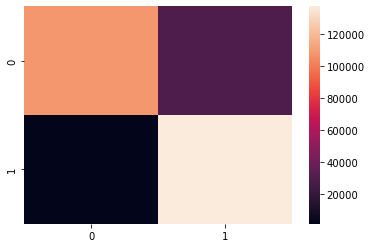

In [112]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr))

# Confusion Matrix

[[108410  29266]
 [  1208 137347]]


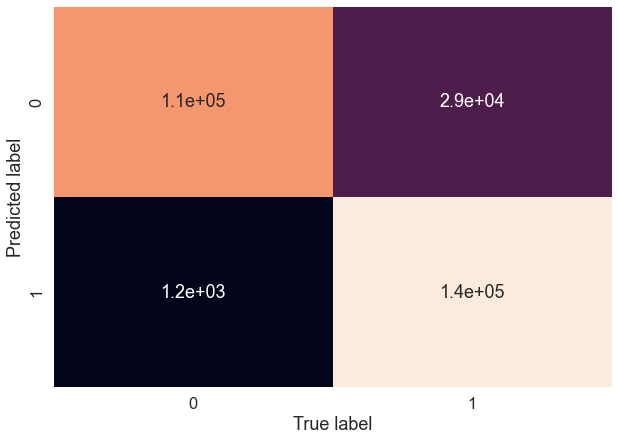

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

sns.set(font_scale=1.5)

y_pred = lr.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

def plot_conf_mat(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(10,7))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_pred)

In [114]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88    137676
           1       0.82      0.99      0.90    138555

    accuracy                           0.89    276231
   macro avg       0.91      0.89      0.89    276231
weighted avg       0.91      0.89      0.89    276231



In [115]:
import numpy
import math
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()

under_sampling['type']=label_encoder.fit_transform(under_sampling['type'])
under_sampling['Fraud_Id']=label_encoder.fit_transform(under_sampling['Fraud_Id'])
under_sampling['Fraud_Id'].unique()

array([0, 1], dtype=int64)

# Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [118]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1)

dt_clf = dt_clf.fit(x_train,y_train)

y_pred_dt = dt_clf.predict(x_test)

In [119]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
print(roc_auc_score(y_test,dt_clf.predict_proba(x_test)[:,1]))

[[137561    115]
 [ 36010 102545]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    137676
           1       1.00      0.74      0.85    138555

    accuracy                           0.87    276231
   macro avg       0.90      0.87      0.87    276231
weighted avg       0.90      0.87      0.87    276231

0.8696339568264233


# XGBoost classifier

In [120]:
xgbclassifier=xgb.XGBClassifier()
xgbclassifier.fit(x_train,y_train)
y_pred_xgb=xgbclassifier.predict(x_test)

In [121]:
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(roc_auc_score(y_test,xgbclassifier.predict_proba(x_test)[:,1]))

[[137529    147]
 [ 28666 109889]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91    137676
           1       1.00      0.79      0.88    138555

    accuracy                           0.90    276231
   macro avg       0.91      0.90      0.89    276231
weighted avg       0.91      0.90      0.89    276231

0.9560786859230963


<AxesSubplot:>

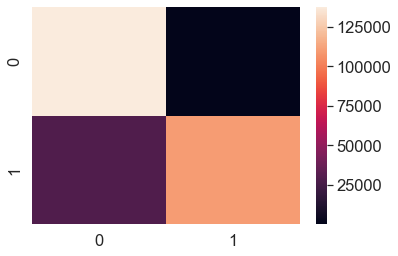

In [122]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb))

# Neuaral Network 

In [123]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
ncols = len(x.columns)
hidden_layers = (ncols,ncols,ncols)
max_iter = 1000
MLP = MLPClassifier(hidden_layer_sizes=hidden_layers,max_iter=1000,random_state=42)

# training model
MLP.fit(x_train,y_train)
    
# evaluating model on how it performs on balanced datasets
predictionsMLP = MLP.predict(x_test)
CM_MLP = confusion_matrix(y_test,predictionsMLP)
CR_MLP = classification_report(y_test,predictionsMLP)
fprMLP, recallMLP, thresholdsMLP = roc_curve(y_test, predictionsMLP)
AUC_MLP = auc(fprMLP, recallMLP)
    
resultsMLP = {"Confusion Matrix":CM_MLP,"Classification Report":CR_MLP,"Area Under Curve":AUC_MLP}

In [124]:
for measure in resultsMLP:
    print(measure,": \n",resultsMLP[measure])

Confusion Matrix : 
 [[136342   1334]
 [ 10344 128211]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    137676
           1       0.99      0.93      0.96    138555

    accuracy                           0.96    276231
   macro avg       0.96      0.96      0.96    276231
weighted avg       0.96      0.96      0.96    276231

Area Under Curve : 
 0.9578271552941923


# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
rf = RandomForestClassifier().fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
rf.score(x_test, y_test)

0.8888828552914046

In [126]:
# 25 estimators
rf = RandomForestClassifier(n_estimators=25).fit(x_train, y_train)
rf.score(x_test, y_test)


0.890591570098939

In [127]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(roc_auc_score(y_test,rf.predict_proba(x_test)[:,1]))

[[137523    153]
 [ 30541 108014]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    137676
           1       1.00      0.78      0.88    138555

    accuracy                           0.89    276231
   macro avg       0.91      0.89      0.89    276231
weighted avg       0.91      0.89      0.89    276231

0.9245208085222494


<AxesSubplot:>

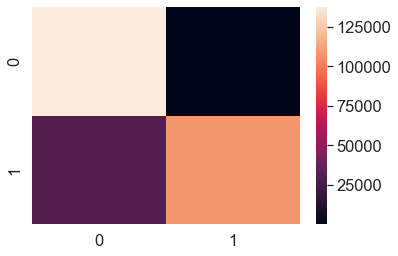

In [128]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf))

In [129]:
models={
     "Logistic Regression" : LogisticRegression()
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Logistic Regressiontrained
Logistic Regression88.97%


In [130]:
models={
     "K-Nearest Neighbors":KNeighborsClassifier()
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

K-Nearest Neighborstrained
K-Nearest Neighbors89.89%


In [131]:
models={
     "Decision Tree"   : DecisionTreeClassifier()
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Decision Treetrained
Decision Tree86.49%


In [132]:
models={
    "Random Forest": RandomForestClassifier()
    
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Random Foresttrained
Random Forest89.05%


In [133]:
models={
    "Neural Network": MLPClassifier()
    
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Neural Networktrained
Neural Network95.62%


In [134]:
models={
    "Gradient Boosting":GradientBoostingClassifier()
    
} 

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + "trained")
    
for name,model in models.items():
    print(name + "{:.2f}%".format(model.score(x_test,y_test)*100))

Gradient Boostingtrained
Gradient Boosting89.79%


In [135]:
# compare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('MC', MLPClassifier()))
models.append(('XGB',xgb.XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.797686 (0.074759)
KNN: 0.902609 (0.066457)
CART: 0.992798 (0.010553)
MC: 0.832016 (0.161612)
XGB: 0.996603 (0.008755)


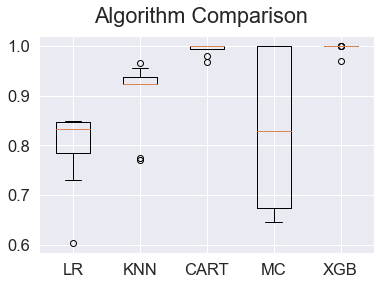

In [148]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


scaler = StandardScaler().fit(x_train)
x_train = scaler.fit_transform(x_train)
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [138]:
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(x_test)
predictions = model.predict(rescaledValidationX)
predictions

array([1, 1, 0, ..., 1, 1, 0])

In [139]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9997321082717001
[[138218     66]
 [     8 137939]]


As per our model building roc_auc_score is high in XG BOOST


so the finalized best model is XGBOOST

# Deployment

Model Saving

In [140]:
from pickle import dump
from pickle import load

In [141]:
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open('filename', 'wb'))

In [142]:
# load the model from disk
loaded_model = load(open('filename', 'rb'))

result = loaded_model.score(rescaledValidationX, y_test)
print(result)

0.9997321082717001


In [143]:
y_test

3853148    1
66637      1
6164617    0
103352     1
4208514    0
          ..
1800455    1
6070043    1
156723     1
1163105    1
5320369    0
Name: Fraud_Id, Length: 276231, dtype: int64